# Identifying Fraud at Enron Using Emails and Financial Data


## Udacity Course - Intro to Machine Learning Final Project


### Project Introduction

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives. 

For this project, predictive models were built using scikit learn, numpy, and pandas modules in Python. The target of the predictions were persons-of-interest (POI’s) who were ‘individuals who were indicted, reached a settlement, or plea deal with the government, or testified in exchange for prosecution immunity.’ Financial compensation data and aggregate email statistics from the Enron Corpus were used as features for prediction.


The goal of this project wass the build a prediction model to identify persons-of-interest (POI’s.) 

### Understanding the Dataset and Question

#### Data Exploration (related mini-project: Lesson 5)

Student response addresses the most important characteristics of the dataset and uses these characteristics to 
inform their analysis. 

Important characteristics include:
    Total number of data points
    Allocation across classes (POI/non-POI)
    Number of features used
    Are there features with many missing values? etc.

In [1]:
# import libraries
import sys
import pickle
import numpy as np
import pandas as pd
import sklearn
#from ggplot import *
import matplotlib as plt
%matplotlib inline

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data


/Users/LiWang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# features_list is a list of strings, each of which is a feature name.
# The first feature must be "poi".
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 
                 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'] 

### Load the dictionary containing the dataset
with open("final_project_dataset_modified.pkl", "r") as data_file:
    enron_dict = pickle.load(data_file)
    
enron_dict['METTS MARK'].keys()

f = open('poi_names.txt', 'r')


The features in the data fall into three major types, namely financial features, email features and POI labels.

financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

POI label: [‘poi’] (boolean, represented as integer)

I'm going to try to use all features, filter them and choose the best.

In [3]:
# Change data dictionary to pandas DataFrame
df = pd.DataFrame.from_records(list(enron_dict.values()))
persons = pd.Series(list(enron_dict.keys()))

print persons.head()
print df.head()

0          METTS MARK
1       BAXTER JOHN C
2      ELLIOTT STEVEN
3    CORDES WILLIAM R
4      HANNON KEVIN P
dtype: object
     bonus deferral_payments deferred_income director_fees  \
0   600000               NaN             NaN           NaN   
1  1200000           1295738        -1386055           NaN   
2   350000               NaN         -400729           NaN   
3      NaN               NaN             NaN           NaN   
4  1500000               NaN        -3117011           NaN   

              email_address exercised_stock_options expenses from_messages  \
0      mark.metts@enron.com                     NaN    94299            29   
1                       NaN                 6680544    11200           NaN   
2  steven.elliott@enron.com                 4890344    78552           NaN   
3     bill.cordes@enron.com                  651850      NaN            12   
4    kevin.hannon@enron.com                 5538001    34039            32   

  from_poi_to_this_person from_thi

In [4]:
# dataframe dimension
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 21 columns):
bonus                        143 non-null object
deferral_payments            143 non-null object
deferred_income              143 non-null object
director_fees                143 non-null object
email_address                143 non-null object
exercised_stock_options      143 non-null object
expenses                     143 non-null object
from_messages                143 non-null object
from_poi_to_this_person      143 non-null object
from_this_person_to_poi      143 non-null object
loan_advances                143 non-null object
long_term_incentive          143 non-null object
other                        143 non-null object
poi                          143 non-null bool
restricted_stock             143 non-null object
restricted_stock_deferred    143 non-null object
salary                       143 non-null object
shared_receipt_with_poi      143 non-null object
to_messages    

In [9]:
print enron_dict.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

In [5]:
print 'Columns:', list(df.columns.values)
print 'Shape:', df.shape
print 'Number of POI in the dataset:', (df['poi'] == 1).sum()
print 'Number of non-POI in the dataset:', (df['poi'] == 0).sum()

Columns: ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'email_address', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'poi', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']
Shape: (143, 21)
Number of POI in the dataset: 16
Number of non-POI in the dataset: 127


In [6]:
# convert to numpy.nan
df.replace(to_replace='NaN', value=np.nan, inplace=True)

# count number of nan for columns
print df.isnull().sum()


bonus                         64
deferral_payments            106
deferred_income               96
director_fees                127
email_address                 34
exercised_stock_options       44
expenses                      51
from_messages                 59
from_poi_to_this_person       59
from_this_person_to_poi       59
loan_advances                141
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    126
salary                        51
shared_receipt_with_poi       59
to_messages                   59
total_payments                21
total_stock_value             20
dtype: int64


There were 143 total records and 16 POIs in the original dataset.

All features have null data.

#### Outlier Investigation (related mini-project: Lesson 7)

Student response identifies outlier(s) in the financial data, and explains how they are removed or otherwise handled.

In [7]:
# remove column from df if null counter > 65
for column, series in df.iteritems():
    if series.isnull().sum() > 65:
        df.drop(column, axis=1, inplace=True)

# remove email address column
if 'email_address' in list(df.columns.values):
    df.drop('email_address', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 14 columns):
bonus                      79 non-null float64
exercised_stock_options    99 non-null float64
expenses                   92 non-null float64
from_messages              84 non-null float64
from_poi_to_this_person    84 non-null float64
from_this_person_to_poi    84 non-null float64
other                      90 non-null float64
poi                        143 non-null bool
restricted_stock           107 non-null float64
salary                     92 non-null float64
shared_receipt_with_poi    84 non-null float64
to_messages                84 non-null float64
total_payments             122 non-null float64
total_stock_value          123 non-null float64
dtypes: bool(1), float64(13)
memory usage: 14.7 KB


In [10]:
# Impute the missing values
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='median', axis=0)
#imp.fit(df)
#df_imp = pd.DataFrame(imp.transform(df.copy(deep=True)))

df_imp = df.replace(to_replace=np.nan, value=0)
df_imp = df.fillna(0).copy(deep=True)
df_imp.columns = list(df.columns.values)

print df_imp.isnull().sum()
print df_imp.head()

df_imp.describe()


bonus                      0
exercised_stock_options    0
expenses                   0
from_messages              0
from_poi_to_this_person    0
from_this_person_to_poi    0
other                      0
poi                        0
restricted_stock           0
salary                     0
shared_receipt_with_poi    0
to_messages                0
total_payments             0
total_stock_value          0
dtype: int64
       bonus  exercised_stock_options  expenses  from_messages  \
0   600000.0                      0.0   94299.0           29.0   
1  1200000.0                6680544.0   11200.0            0.0   
2   350000.0                4890344.0   78552.0            0.0   
3        0.0                 651850.0       0.0           12.0   
4  1500000.0                5538001.0   34039.0           32.0   

   from_poi_to_this_person  from_this_person_to_poi      other    poi  \
0                     38.0                      1.0     1740.0  False   
1                      0.0            

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,1.430000e+02,1.430000e+02
mean,5.926127e+05,1.715504e+06,34719.447552,365.118881,37.552448,24.475524,2.267385e+05,7.235235e+05,1.714731e+05,676.384615,1191.972028,1.489942e+06,2.404233e+06
std,1.036924e+06,3.694149e+06,45235.547286,1455.675655,74.148184,80.080666,7.552178e+05,1.571184e+06,1.660404e+05,1066.923179,2223.860300,2.386745e+06,4.422592e+06
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.604490e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,8.929250e+04,2.148255e+05
50%,2.500000e+05,6.014380e+05,17355.000000,16.000000,1.000000,0.000000,8.910000e+02,3.466630e+05,2.061210e+05,91.000000,266.000000,9.114530e+05,9.543540e+05
75%,8.000000e+05,1.636136e+06,52688.500000,50.500000,39.500000,12.500000,1.492040e+05,6.801640e+05,2.670975e+05,869.000000,1504.000000,1.858492e+06,2.217787e+06
max,8.000000e+06,3.076606e+07,228763.000000,14368.000000,528.000000,609.000000,7.427621e+06,1.384707e+07,1.060932e+06,5521.000000,15149.000000,1.725253e+07,3.076606e+07


In [14]:
# drop row for 'THE TRAVEL AGENCY IN THE PARK'

park_index = enron_dict.keys().index('THE TRAVEL AGENCY IN THE PARK')
print park_index
df_imp_sub = df_imp.drop(df_imp.index[[park_index]])

99


In [21]:
enron_dict['LOCKHART EUGENE E']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

In [22]:
lockhart_index = enron_dict.keys().index('LOCKHART EUGENE E')
print lockhart_index
df_imp_sub = df_imp.drop(df_imp.index[[lockhart_index]])

89


'THE TRAVEL AGENCY IN THE PARK' was removed since it is not a person.
Eugene E. Lockhart was removed during data processing since this row had no entries for any feature.

### Optimize Feature Selection/Engineering

#### Create new features (related mini-project: Lesson 11)

At least one new feature is implemented. Justification for that feature is provided in the written response, and the effect of that feature on the final algorithm performance is tested. The student is not required to include their new feature in their final feature set.

In [23]:
enron_df = df_imp_sub

#### Study Financial Features 

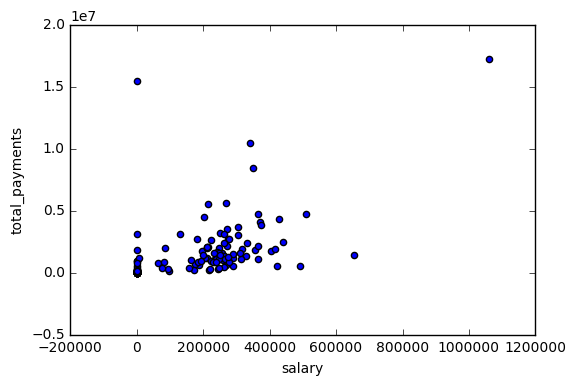

In [24]:
# Graph for features

import matplotlib.pyplot as plt

plt.scatter(enron_df['salary'], enron_df['total_payments'])
plt.xlabel("salary")
plt.ylabel("total_payments")
plt.show()

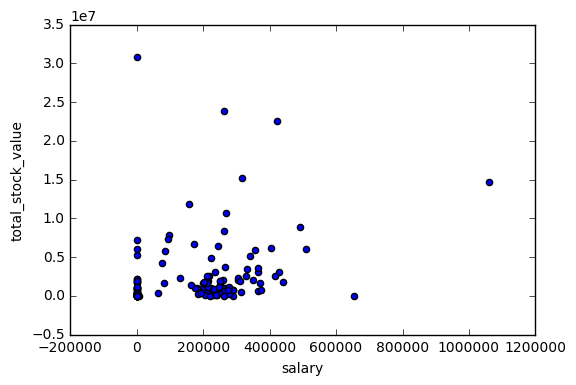

In [25]:
plt.scatter(enron_df['salary'], enron_df['total_stock_value'])
plt.xlabel("salary")
plt.ylabel("total_stock_value")
plt.show()

#### For email related features

In [ ]:
# Mark as fraud for those with outrageous compensation
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where
        each tuple is of the form (age, net_worth, error).
    """

    cleaned_data = []

    #print 'starting clean read data to tuple'
    #print 'length:', len(predictions)
    ### your code goes here
    for i in range(0, len(predictions)):
        age = ages[i][0]
        net_worth = net_worths[i][0]
        pred = predictions[i][0]
        err = net_worth - pred

        cleaned_data.append((age, net_worth, err))

    #print 'length of cleaned_data before sort:', len(cleaned_data)
    cleaned_data = sorted(cleaned_data, key=lambda x: x[2], reverse=True)[0:81]
    #print cleaned_data[-1]

    print 'length of cleaned_data:', len(cleaned_data)
    return cleaned_data


Create column 'poi_ratio' to store POI related message ratio in percentages. 

Also will be added next features:
the fraction of all emails to a person that were sent from a person of interest
the fraction of all emails that a person sent that were addressed to persons of interest

The hypothesis behind these features was that there might be stronger email connections between POIs than between 
POIs and non-POIs, and a scatterplot of these two features suggests that there might be some truth to that hypothesis.

Additionally I want to scale 'salary' to range [0,100].

In [34]:
enron_df['poi_ratio'] = 0.0
enron_df['fraction_to_poi'] = 0.0
enron_df['fraction_from_poi'] = 0.0

enron_df.loc[(enron_df['from_messages'] + enron_df['to_messages']) != 0.0, 'poi_ratio'] = (enron_df['from_poi_to_this_person'] + enron_df['from_this_person_to_poi']) / (enron_df['from_messages'] + enron_df['to_messages']) * 100
enron_df.loc[enron_df['from_messages'] != 0.0, 'fraction_to_poi'] = enron_df['from_this_person_to_poi'] / enron_df['from_messages'] * 100
enron_df.loc[enron_df['to_messages'] != 0.0, 'fraction_from_poi']= enron_df['from_poi_to_this_person'] / enron_df['to_messages'] * 100

enron_df.describe()

In [35]:
enron_df.head()

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,poi_ratio,fraction_to_poi,fraction_from_poi
0,600000.0,0.0,94299.0,29.0,38.0,1.0,1740.0,False,585062.0,365788.0,702.0,807.0,1061827.0,585062.0,4.665072,3.448276,4.708798
1,1200000.0,6680544.0,11200.0,0.0,0.0,0.0,2660303.0,False,3942714.0,267102.0,0.0,0.0,5634343.0,10623258.0,0.000000,0.000000,0.000000
2,350000.0,4890344.0,78552.0,0.0,0.0,0.0,12961.0,False,1788391.0,170941.0,0.0,0.0,211725.0,6678735.0,0.000000,0.000000,0.000000
3,0.0,651850.0,0.0,12.0,10.0,0.0,0.0,False,386335.0,0.0,58.0,764.0,0.0,1038185.0,1.288660,0.000000,1.308901
4,1500000.0,5538001.0,34039.0,32.0,32.0,21.0,11350.0,True,853064.0,243293.0,1035.0,1045.0,288682.0,6391065.0,4.921077,65.625000,3.062201


In [ ]:
#df['price'] = df.apply(lambda row: valuation_formula(row['x'], row['y']), axis=1)

enron_df['poi_msg_ratio'] = (enron_df['from_poi_to_this_person'] + enron_df['from_this_person_to_poi']) / (enron_df['from_messages'] + enron_df['to_messages']) * 100.0
enron_df['fraction_to_poi'] = (enron_df['from_this_person_to_poi']) / (enron_df['from_messages']) * 100.0
enron_df['fraction_from_poi'] = (enron_df['from_poi_to_this_person']) / (enron_df['to_messages']) * 100.0

#scale = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 100), copy=True)
#salary_scaled = scale.fit_transform(df_imp_sub['salary'])

enron_df.describe()

In [ ]:
# Graph 'fraction_to_poi' and 'fraction_from_poi' to salary
plt.scatter('salary', 'fraction_to_poi', color='blue')
plt.scatter('salary', 'fraction_from_poi', color='red')
plt.xlabel('Salary')
plt.ylabel('Fraction')
plt.show()

#### Intelligently select features (related mini-project: Lesson 11)

Univariate or recursive feature selection is deployed, or features are selected by hand (different combinations of features are attempted, and the performance is documented for each one). Features that are selected are reported and the number of features selected is justified. For an algorithm that supports getting the feature importances (e.g. decision tree) or feature scores (e.g. SelectKBest), those are documented as well.

In [ ]:
# Split the data at first on training and test data. We will use Stratified Shuffle Split due to small dataset
labels = enron_df['poi'].copy(deep=True).astype(int).as_matrix()

features = enron_df['total_payments', 'total_stock_value', 'poi_ratio', 'fraction_to_poi', 'fraction_from_poi'].as_matrix()
#features = (df_im_sub.drop('poi', axis=1)).fillna(0).copy(deep=True).as_matrix()

print labels
print features

#### Properly scale features (related mini-project: Lesson 9)

If algorithm calls for scaled features, feature scaling is deployed.

### Pick and Tune an Algorithm

#### Pick an algorithm (related mini-project: Lessons 1-3)

At least 2 different algorithms are attempted and their performance is compared, with the more performant one used in the final analysis.

In [ ]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html



In [ ]:
# Data transformation with held out data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(features_train)
features_train_transformed = scaler.transform(features_train)
clf = svm.SVC(C=1).fit(features_train_transformed, labels_train)
features_test_transformed = scaler.transform(features_test)
clf.score(features_test_transformed, labels_test)  

In [ ]:
shuffle = sklearn.cross_validation.StratifiedShuffleSplit(labels, 4, test_size=0.3, random_state=0)

In [ ]:
# Try SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X = scaler.fit_transform(X)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))
        
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))


# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()        

In [ ]:
# Try GaussianNB
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
scores = sklearn.cross_validation.cross_val_score(gnb_clf, features, labels)
print scores

In [ ]:
# Try ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

erf_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
scores = sklearn.cross_validation.cross_val_score(erf_clf, features, labels)
print scores

In [ ]:
# Try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(rf_clf, features, labels)

print scores

In [ ]:
# Try AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier(n_estimators=100)
scores = sklearn.cross_validation.cross_val_score(ab_clf, features, labels)
print scores 


Choosen Algorithms:
Random Forest
AdaBoost
Why not SVM? It's too slow for tuning, i want more computational time efficient algorithm.
SVM and NB seems not to be good choice from initial scores.


#### Discuss parameter tuning and its importance.

Response addresses what it means to perform parameter tuning and why it is important.

#### Tune the algorithm (related mini-project: Lessons 2, 3, 13)

At least one important parameter tuned with at least 3 settings investigated systematically, or any of the following are true:

GridSearchCV used for parameter tuning
Several parameters tuned
Parameter tuning incorporated into algorithm selection (i.e. parameters tuned for more than one algorithm, and best algorithm-tune combination selected for final analysis).

### Validate and Evaluate

#### Usage of Evaluation Metrics (related mini-project: Lesson 14)

At least two appropriate metrics are used to evaluate algorithm performance (e.g. precision and recall), and the student articulates what those metrics measure in context of the project task.

#### Discuss validation and its importance.

Response addresses what validation is and why it is important.

#### Validation Strategy (related mini-project: Lesson 13)

Performance of the final algorithm selected is assessed by splitting the data into training and testing sets or 
through the use of cross validation, noting the specific type of validation performed.

In [ ]:
#### Algorithm Performance

When tester.py is used to evaluate performance, precision and recall are both at least 0.3.

In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)



#### Get the best fitting parameters and Testing for RandomForest

In [ ]:
# get the best parameters
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

parameters = {'n_estimators': [10,20,30,40,50],
               'min_samples_split' :[2,3,4,5],
               'min_samples_leaf' : [1,2,3]
             }

rfclf = RandomForestClassifier()
grid_obj = GridSearchCV(rfclf, parameters, cv=cv)
grid_fit = grid_obj.fit(features_train, labels_train)
best_rfclf = grid_fit.best_estimator_ 

best_rfclf.fit(features_train,labels_train)

In [ ]:
# RandomForestClassifier use the best parameter
from sklearn.cross_validation import KFold

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rf.fit(features_train, labels_train)

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(rf, features, labels_train, cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

output = best_rfclf.predict(features_test)
print len(output)

In [ ]:
from sklearn import grid_search

cv = sklearn.cross_validation.StratifiedShuffleSplit(labels, n_iter=10)

def scoring(estimator, features_test, labels_test):
     labels_pred = estimator.predict(features_test)
     p = sklearn.metrics.precision_score(labels_test, labels_pred, average='micro')
     r = sklearn.metrics.recall_score(labels_test, labels_pred, average='micro')
     if p > 0.3 and r > 0.3:
            return sklearn.metrics.f1_score(labels_test, labels_pred, average='macro')
     return 0

'''
parameters = {'max_depth': [2,3,4,5,6],'min_samples_split':[2,3,4,5], 'n_estimators':[10,20,50], 'min_samples_leaf':[1,2,3,4], 'criterion':('gini', 'entropy')}
rf_clf = RandomForestClassifier()
rfclf = grid_search.GridSearchCV(rf_clf, parameters, scoring = scoring, cv = cv)
rfclf.fit(features, labels)

print rfclf.best_estimator_
print rfclf.best_score_
'''

#### Get the best fitting parameters and Testing for Adaboost

In [ ]:

from sklearn import grid_search
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
parameters = {'n_estimators' : [5, 10, 30, 40, 50, 100,150], 
              'learning_rate' : [0.1, 0.5, 1, 1.5, 2, 2.5], 
              'algorithm' : ('SAMME', 'SAMME.R')}
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8))
adaclf = grid_search.GridSearchCV(ada_clf, parameters, scoring = scoring, cv = cv)
adaclf.fit(features, labels)

print adaclf.best_estimator_
print adaclf.best_score_

### Dump your classifier, dataset, and features_list for checking

Dump your classifier, dataset, and features_list so anyone cancheck your results. You do not need to change anything below, but make sure that the version of poi_id.py that you submit can be run on its own and generates the necessary .pkl files for validating your results.


In [ ]:
# prepare parameter for dump classifier
clf_dump = adaclf

features_list = list(df_imp_sub.columns.values)

list_cols = list(df_subset.columns.values)
features_list.remove('poi')
features_list.insert(0, 'poi')
data = df_subset[features_list].fillna(0).to_dict(orient='records')
enron_data_sub = {}
counter = 0
for item in data:
    enron_data_sub[counter] = item
    counter += 1
    
my_dataset = enron_data_sub    

In [ ]:
# 
dump_classifier_and_data(clf_dump, my_dataset, features_list)

### List of Resources


sklearn documentation: http://scikit-learn.org/stable/index.html
pandas documentation: http://pandas.pydata.org
Jason Brownlee on Machine Learning Process:  How to Identify Outliers in your Data http://machinelearningmastery.com/how-to-identify-outliers-in-your-data/
